<a href="https://colab.research.google.com/github/Sarvani-5/Anime_Recommendation/blob/main/ML_Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selected Features:  ['Rating', 'Episodes']


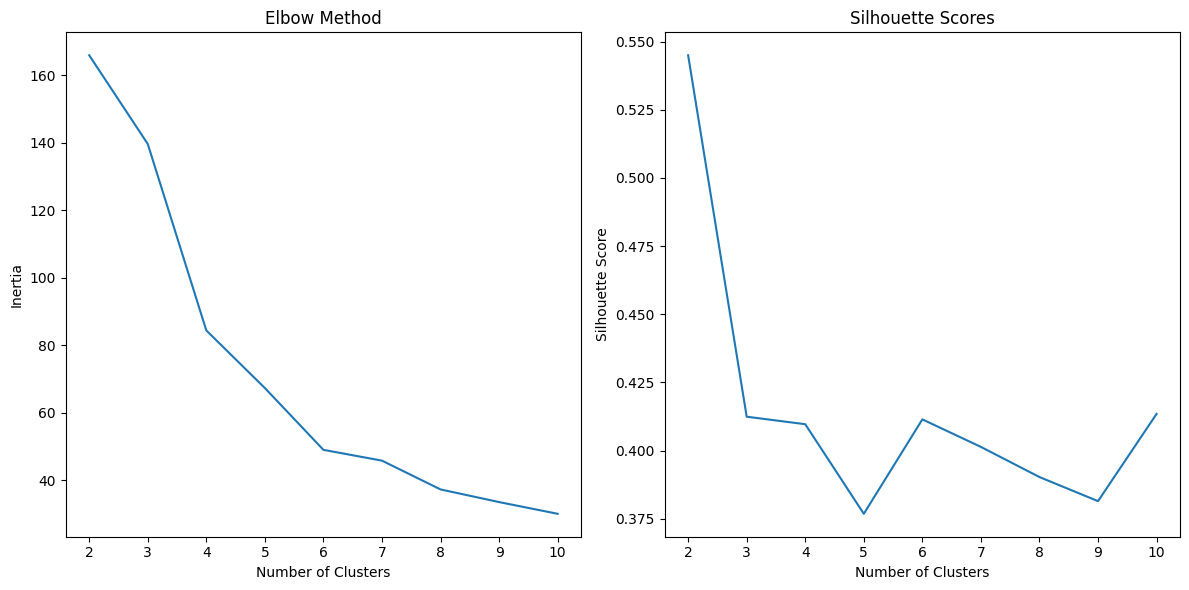

Initial Clusters (KMeans):
 [1 1 0 ... 1 1 1]
Final Clusters (KMeans):
 [1 1 0 ... 1 1 1]
Error Rate (KMeans): 165.9011624261848
Silhouette Score (KMeans): 0.5449596373268553
Epochs (KMeans): 20


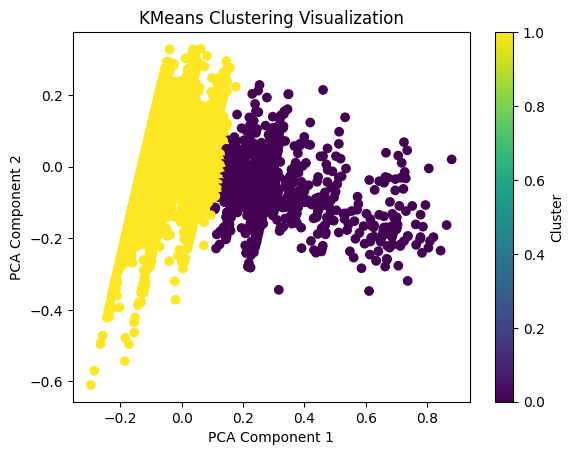

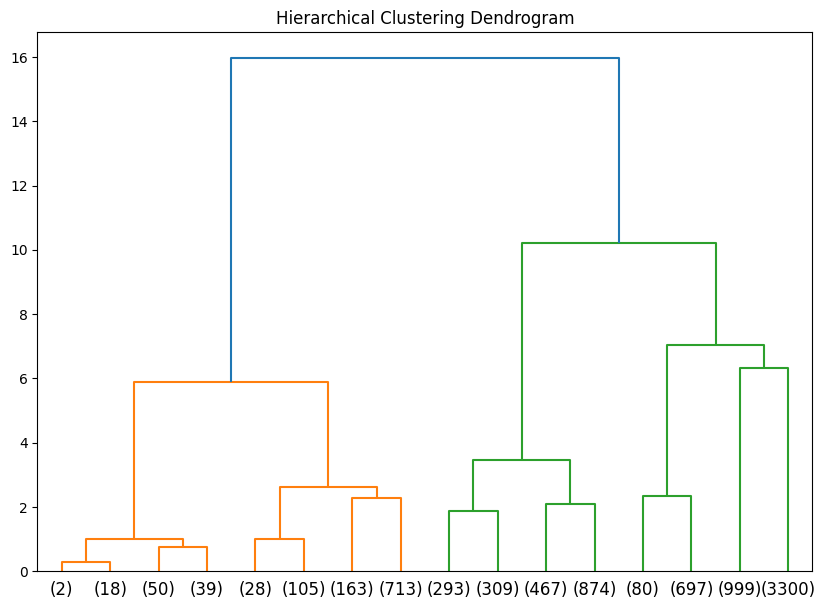

Initial Clusters (Agglomerative):
 [0 0 1 ... 0 0 0]
Final Clusters (Agglomerative):
 [0 0 1 ... 0 0 0]
Silhouette Score (Agglomerative): 0.5457003706534662


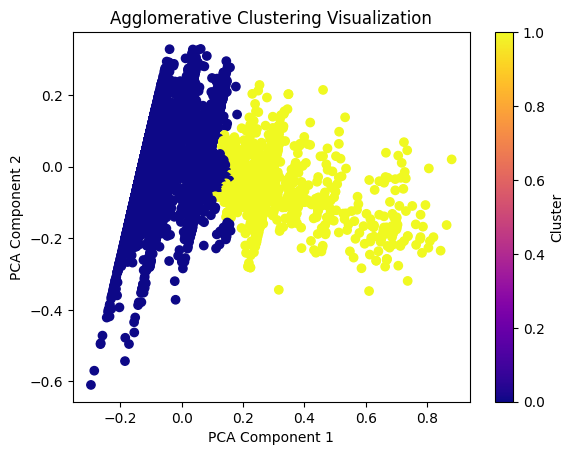

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Load your dataset (update the path to your CSV file in Google Drive)
data = pd.read_csv('/content/drive/My Drive/Anime.csv')  # Update this path

# Clean the data by removing rows with missing values
data.dropna(subset=['Rating', 'Episodes'], inplace=True)

# Remove outliers based on Z-score for 'Episodes'
from scipy import stats
data = data[(np.abs(stats.zscore(data['Episodes'])) < 3)]

# Select relevant features for clustering
features = ['Rating', 'Episodes']
print("Selected Features: ", features)

# Standardize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Determine optimal number of clusters using the Elbow Method for KMeans
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Optimal number of clusters based on silhouette scores
optimal_clusters = np.argmax(silhouette_scores) + 2

# KMeans Clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(pca_data)

# Print Initial and Final Clusters, Error Rate, Silhouette Score, and Epochs for KMeans
initial_clusters_kmeans = kmeans.labels_
final_clusters_kmeans = kmeans.labels_
error_rate_kmeans = kmeans.inertia_
sil_score_kmeans = silhouette_score(pca_data, final_clusters_kmeans)
epochs_kmeans = kmeans.n_iter_

print(f"Initial Clusters (KMeans):\n", initial_clusters_kmeans)
print(f"Final Clusters (KMeans):\n", final_clusters_kmeans)
print(f"Error Rate (KMeans): {error_rate_kmeans}")
print(f"Silhouette Score (KMeans): {sil_score_kmeans}")
print(f"Epochs (KMeans): {epochs_kmeans}")

# Visualizing KMeans Clustering
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_clusters_kmeans, cmap='viridis')
plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Hierarchical (Agglomerative) Clustering and Dendrogram Visualization
Z = linkage(pca_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=3, labels=data.index)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Agglomerative Clustering with the same number of clusters
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)
agglomerative_labels = agglomerative.fit_predict(pca_data)

# Print Final Clusters and Silhouette Score for Agglomerative Clustering
initial_clusters_agg = agglomerative.labels_
final_clusters_agg = agglomerative.labels_
sil_score_agg = silhouette_score(pca_data, final_clusters_agg)

print(f"Initial Clusters (Agglomerative):\n", initial_clusters_agg)
print(f"Final Clusters (Agglomerative):\n", final_clusters_agg)
print(f"Silhouette Score (Agglomerative): {sil_score_agg}")

# Visualizing Agglomerative Clustering
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_clusters_agg, cmap='plasma')
plt.title("Agglomerative Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.cluster import KMeans

# Assuming 'data' is a DataFrame with the necessary features
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Rating']])  # Example using 'Rating' as a feature for clustering
final_clusters = data['Cluster'].values  # Save the cluster labels as 'final_clusters'


In [ ]:
import numpy as np
import pandas as pd

class QLearningPlaylist:
    def __init__(self, data, cluster, n_dramas=5, rating_threshold=3):
        self.data = data
        self.cluster = cluster
        self.n_dramas = n_dramas
        self.rating_threshold = rating_threshold
        self.q_table = {}
        self.initialize_q_table()

    def initialize_q_table(self):
        """Initialize Q-table for each drama with random Q-values."""
        for drama_id in self.data.index:
            self.q_table[drama_id] = np.random.uniform(0, 1)

    def update_q_value(self, drama_id, reward, learning_rate=0.1, discount_factor=0.95):
        """Update Q-values using the Q-learning formula."""
        old_q_value = self.q_table[drama_id]
        max_next_q = max(self.q_table.values())  # Max future reward
        # Q-learning update rule
        self.q_table[drama_id] += learning_rate * (reward + discount_factor * max_next_q - old_q_value)

    def generate_recommendation(self):
        """Generate a list of top K-Dramas using Q-learning."""
        recommended_dramas = []

        # Filter available dramas in the cluster based on user input
        if self.cluster == 0:
            available_dramas = self.data[(final_clusters == self.cluster) & (self.data['Rating'] < 3)]
        elif self.cluster == 1:
            available_dramas = self.data[(final_clusters == self.cluster) & (self.data['Rating'] >= 3) & (self.data['Rating'] <= 4)]
        elif self.cluster == 2:
            available_dramas = self.data[(final_clusters == self.cluster) & (self.data['Rating'] > 4)]
        else:
            available_dramas = pd.DataFrame()  # Empty DataFrame if cluster is invalid

        # Debugging: Check how many dramas are available
        print(f"Available Animes in cluster {self.cluster}: {available_dramas.shape[0]}")

        # If no dramas are available, return an appropriate message
        if available_dramas.empty:
            print("No available dramas for the selected cluster and rating criteria.")
            return pd.DataFrame(columns=['Name', 'Rating', 'Description'])  # Return an empty DataFrame

        # Create a list of tuples (drama_id, Q-value) for sorting
        available_dramas_with_q = [(index, self.q_table[index]) for index in available_dramas.index]

        # Sort by Rating (descending) and then by Q-value (descending)
        available_dramas_sorted = sorted(
            available_dramas_with_q,
            key=lambda x: (self.data.loc[x[0], 'Rating'], x[1]),
            reverse=True
        )

        # Select top N dramas based on sorted order
        for drama_id, _ in available_dramas_sorted[:self.n_dramas]:
            recommended_dramas.append(drama_id)

            # Simulate user feedback (like = +1 reward, dislike = -1 reward)
            feedback = np.random.choice([1, -1])  # Simulated feedback
            self.update_q_value(drama_id, reward=feedback)

        recommendations = self.data.loc[recommended_dramas][['Name', 'Rating', 'Description']]
        return recommendations


# Example usage
user_input_cluster = int(input("Enter cluster number (0, 1, or 2) to get recommendations: "))

# Assuming 'data' is your DataFrame and 'final_clusters' is obtained from KMeans or DBSCAN
# Ensure 'final_clusters' is defined properly based on your clustering step
q_learning = QLearningPlaylist(data, user_input_cluster)
q_learning_recommendations = q_learning.generate_recommendation()

# Displaying recommendations in a better format
print(f"\nGenerated Recommendations for Cluster '{user_input_cluster}':")
print(f"{'Title':<40} {'Rating':<10} {'Description'}")
print("-" * 80)
for index, row in q_learning_recommendations.iterrows():
    print(f"{row['Name']:<40} {row['Rating']:<10} {row['Description']}")


Enter cluster number (0, 1, or 2) to get recommendations: 2
Available Animes in cluster 2: 563

Generated Recommendations for Cluster '2':
Title                                    Rating     Description
--------------------------------------------------------------------------------
Fruits Basket the Final Season           4.6        'The final arc of Fruits Basket.'
Mo Dao Zu Shi 3                          4.58       'The third season of Mo Dao Zu Shi.'
Fullmetal Alchemist: Brotherhood         4.58       "The foundation of alchemy is based on the law of equivalent exchange; you cannot produce something from nothing. As such, alchemy is bound by one taboo - human transmutation. Four years ago two young brothers, Edward and Alphonse Elric, broke this taboo when they tried to resurrect their dead mother. During the process Al's body disintegrated and Ed lost his leg. In a desperate attempt to prevent his brother from disappearing completely, Ed sacrificed one of his arms so he could affi

In [ ]:
import numpy as np
import pandas as pd

class SARSAPrPlaylist:
    def __init__(self, data, cluster, n_dramas=5, rating_threshold=3):
        self.data = data
        self.cluster = cluster
        self.n_dramas = n_dramas
        self.rating_threshold = rating_threshold
        self.q_table = {}
        self.initialize_q_table()

    def initialize_q_table(self):
        """Initialize Q-table for each drama with random Q-values."""
        for drama_id in self.data.index:
            self.q_table[drama_id] = np.random.uniform(0, 1)

    def update_q_value(self, drama_id, reward, next_drama_id, learning_rate=0.1, discount_factor=0.95):
        """Update Q-values using the SARSA formula."""
        old_q_value = self.q_table[drama_id]
        next_q_value = self.q_table[next_drama_id]  # Expected Q-value for the next state-action pair
        # SARSA update rule
        self.q_table[drama_id] += learning_rate * (reward + discount_factor * next_q_value - old_q_value)

    def generate_recommendation(self):
        """Generate a list of top K-Dramas using SARSA."""
        recommended_dramas = []

        # Filter available dramas in the cluster based on user input
        if self.cluster == 0:
            available_dramas = self.data[(final_clusters == self.cluster) & (self.data['Rating'] < 3)]
        elif self.cluster == 1:
            available_dramas = self.data[(final_clusters == self.cluster) & (self.data['Rating'] >= 3) & (self.data['Rating'] <= 4)]
        elif self.cluster == 2:
            available_dramas = self.data[(final_clusters == self.cluster) & (self.data['Rating'] > 4)]
        else:
            available_dramas = pd.DataFrame()  # Empty DataFrame if cluster is invalid

        # Debugging: Check how many dramas are available
        print(f"Available Animes in cluster {self.cluster}: {available_dramas.shape[0]}")

        # If no dramas are available, return an appropriate message
        if available_dramas.empty:
            print("No available dramas for the selected cluster and rating criteria.")
            return pd.DataFrame(columns=['Name', 'Rating', 'Description'])  # Return an empty DataFrame

        # Create a list of tuples (drama_id, Q-value) for sorting
        available_dramas_with_q = [(index, self.q_table[index]) for index in available_dramas.index]

        # Sort by Rating (descending) and then by Q-value (descending)
        available_dramas_sorted = sorted(
            available_dramas_with_q,
            key=lambda x: (self.data.loc[x[0], 'Rating'], x[1]),
            reverse=True
        )

        # Select top N dramas based on sorted order
        for i, (drama_id, _) in enumerate(available_dramas_sorted[:self.n_dramas]):
            recommended_dramas.append(drama_id)

            # Simulate user feedback (like = +1 reward, dislike = -1 reward)
            feedback = np.random.choice([1, -1])  # Simulated feedback
            # Choose the next drama for SARSA update if available
            if i + 1 < len(available_dramas_sorted):
                next_drama_id = available_dramas_sorted[i + 1][0]
            else:
                next_drama_id = drama_id  # Loop back if at end of list

            self.update_q_value(drama_id, reward=feedback, next_drama_id=next_drama_id)

        recommendations = self.data.loc[recommended_dramas][['Name', 'Rating', 'Description']]
        return recommendations


# Example usage
user_input_cluster = int(input("Enter cluster number (0, 1, or 2) to get recommendations: "))

# Assuming 'data' is your DataFrame and 'final_clusters' is obtained from KMeans or DBSCAN
# Ensure 'final_clusters' is defined properly based on your clustering step
sarsa_playlist = SARSAPrPlaylist(data, user_input_cluster)
sarsa_recommendations = sarsa_playlist.generate_recommendation()

# Displaying recommendations in a better format
print(f"\nGenerated Recommendations for Cluster '{user_input_cluster}':")
print(f"{'Title':<40} {'Rating':<10} {'Description'}")
print("-" * 80)
for index, row in sarsa_recommendations.iterrows():
    print(f"{row['Name']:<40} {row['Rating']:<10} {row['Description']}")


Enter cluster number (0, 1, or 2) to get recommendations: 1
Available Animes in cluster 1: 436

Generated Recommendations for Cluster '1':
Title                                    Rating     Description
--------------------------------------------------------------------------------
Ponkotsuland Saga                        3.08       No synopsis yet - check back soon!
Yurumates (2012)                         3.08       No synopsis yet - check back soon!
Master of Torque 3                       3.08       Third season of Master of Torque.
PiNMeN rework                            3.08       No synopsis yet - check back soon!
Puzzle & Dragons X                       3.08       Dorogoza Island is rich in “Drop Energy” that players can use on friendly monsters. Once strong enough, they can face enemies in puzzle wars. Winners reap rewards, but what happens to the losers? Only the brave can take on these monstrous challenges!


In [ ]:
import numpy as np
import pandas as pd

class PolicyGradientPlaylist:
    def __init__(self, data, cluster, n_dramas=5, rating_threshold=3, learning_rate=0.01):
        self.data = data
        self.cluster = cluster
        self.n_dramas = n_dramas
        self.rating_threshold = rating_threshold
        self.learning_rate = learning_rate
        self.policy_probs = {}
        self.initialize_policy()

    def initialize_policy(self):
        """Initialize policy probabilities for each drama in the data."""
        # Each drama starts with an equal probability
        total_dramas = len(self.data.index)
        initial_prob = 1 / total_dramas
        for drama_id in self.data.index:
            self.policy_probs[drama_id] = initial_prob

    def update_policy(self, drama_id, reward):
        """Update policy using the Policy Gradient formula."""
        # Adjust probability of chosen drama
        self.policy_probs[drama_id] += self.learning_rate * reward

        # Normalize probabilities to sum to 1
        total_prob = sum(self.policy_probs.values())
        for drama in self.policy_probs:
            self.policy_probs[drama] /= total_prob

    def generate_recommendation(self):
        """Generate a list of top K-Dramas using Policy Gradient."""
        recommended_dramas = []

        # Filter available dramas in the cluster based on user input
        if self.cluster == 0:
            available_dramas = self.data[(final_clusters == self.cluster) & (self.data['Rating'] < 3)]
        elif self.cluster == 1:
            available_dramas = self.data[(final_clusters == self.cluster) & (self.data['Rating'] >= 3) & (self.data['Rating'] <= 4)]
        elif self.cluster == 2:
            available_dramas = self.data[(final_clusters == self.cluster) & (self.data['Rating'] > 4)]
        else:
            available_dramas = pd.DataFrame()  # Empty DataFrame if cluster is invalid

        # Debugging: Check how many dramas are available
        print(f"Available Animes in cluster {self.cluster}: {available_dramas.shape[0]}")

        # If no dramas are available, return an appropriate message
        if available_dramas.empty:
            print("No available dramas for the selected cluster and rating criteria.")
            return pd.DataFrame(columns=['Name', 'Rating', 'Description'])  # Return an empty DataFrame

        # Sample dramas based on current policy probabilities
        available_drama_ids = available_dramas.index
        drama_probs = [self.policy_probs[drama_id] for drama_id in available_drama_ids]

        # Normalize to ensure probabilities sum to 1
        drama_probs /= np.sum(drama_probs)

        # Recommend dramas based on sampled probabilities
        sampled_drama_ids = np.random.choice(available_drama_ids, size=self.n_dramas, p=drama_probs, replace=False)

        for drama_id in sampled_drama_ids:
            recommended_dramas.append(drama_id)

            # Simulate user feedback (like = +1 reward, dislike = -1 reward)
            feedback = np.random.choice([1, -1])  # Simulated feedback
            self.update_policy(drama_id, reward=feedback)

        recommendations = self.data.loc[recommended_dramas][['Name', 'Rating', 'Description']]
        return recommendations


# Example usage
user_input_cluster = int(input("Enter cluster number (0, 1, or 2) to get recommendations: "))

# Assuming 'data' is your DataFrame and 'final_clusters' is obtained from KMeans or DBSCAN
# Ensure 'final_clusters' is defined properly based on your clustering step
policy_gradient_playlist = PolicyGradientPlaylist(data, user_input_cluster)
policy_gradient_recommendations = policy_gradient_playlist.generate_recommendation()

# Displaying recommendations in a better format
print(f"\nGenerated Recommendations for Cluster '{user_input_cluster}':")
print(f"{'Title':<40} {'Rating':<10} {'Description'}")
print("-" * 80)
for index, row in policy_gradient_recommendations.iterrows():
    print(f"{row['Name']:<40} {row['Rating']:<10} {row['Description']}")


Enter cluster number (0, 1, or 2) to get recommendations: 1
Available Animes in cluster 1: 436

Generated Recommendations for Cluster '1':
Title                                    Rating     Description
--------------------------------------------------------------------------------
Plastic Little                           3.05       Tita is the captain of the Cha-Cha Maru, whose crew hunts exotic animals to sell for profit. One day, by chance, Tita saves the life of a girl named Elysse, whose dangerous past puts the whole crew of the Cha-Cha Maru in harm's way! Now, against the clock, Tita and her gang must stop an insidious plot which threatens the entire world!
Diabolik Lovers OVA                      3.04       No synopsis yet - check back soon!
Kidou Shinsengumi Moeyo Ken TV           3.07       Sakamoto Ryuunosuke is the son of the president of the Kidou Shinsengumi Corporation, a company that deals with capturing all unregistered youkai. Ryuunosuke has been studying abroad and h